In [80]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from collections import defaultdict
from lib import plotting
import matplotlib
from lib.envs.windy_gridworld import WindyGridworldEnv

import itertools
matplotlib.style.use('ggplot')


In [81]:
env = WindyGridworldEnv()

In [82]:
def make_epison_greedy_policy(Q, epsilon):
    def policy(state):
        A = epsilon * np.ones(len(Q[state]), dtype=float)/len(Q[state])
        best_action = np.argmax(Q[state])
        A[best_action] += (1-epsilon)
        return A
    return policy

In [83]:
def on_policy_sarsa(env, num_episodes, discount=1.00, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = make_epison_greedy_policy(Q, epsilon)
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))
    
    for i in range(num_episodes):
        state = env.reset()
        action = np.random.choice(np.arange(env.action_space.n), p=policy(state))
        for t in itertools.count():
            next_state, reward, done, _ = env.step(action)
            next_action = np.random.choice(np.arange(env.action_space.n), p=policy(next_state))
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] = t
            Q[state][action] += 0.5*((reward + discount*Q[next_state][next_action]) - Q[state][action])
            if done:
                break
            state = next_state
            action = next_action
    return Q, stats

In [84]:
Q, stats = on_policy_sarsa(env, num_episodes=200, epsilon=0.1)


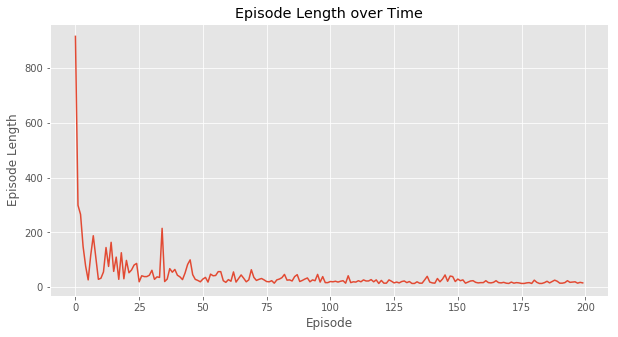

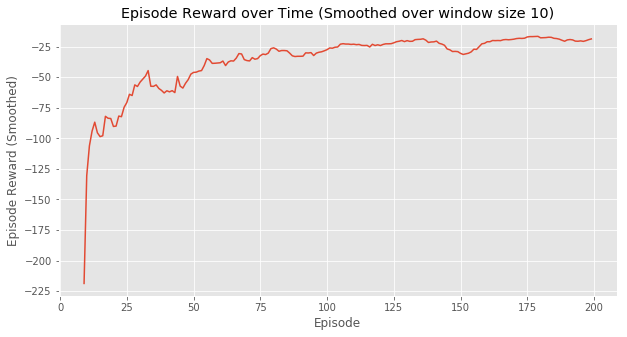

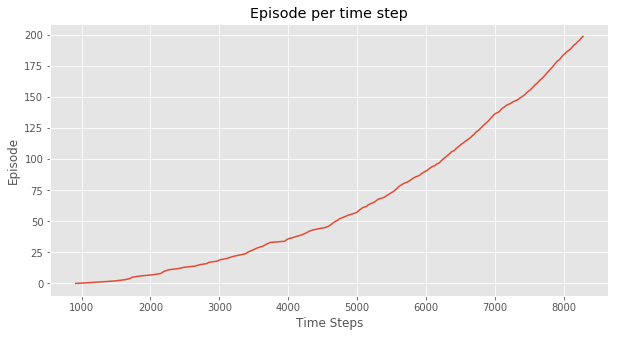

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [85]:
plotting.plot_episode_stats(stats)